In [7]:
# Автор задач Karpov.Courses
# https://karpov.courses/analytics?_gl=1*k4q7fv*_ga*MTIzOTE2ODc5MS4xNzA4NDEyMTEy*_ga_DZP7KEXCQQ*MTcxMDQxMTg2OS41Ni4xLjE3MTA0MTUyODkuMTAuMC4w

In [8]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
path_to_folder = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-anna-nikitina/lesson_2_introduction/'
path_to_file = ''.join([path_to_folder, 'lesson_2_data.csv'])
df = pd.read_csv(path_to_file, sep=';', encoding='windows-1251')

In [10]:
#Предобработка

In [11]:
df_rename = {'Номер':'number',
              'Дата создания':'date_creat', 
              'Дата оплаты':'date_pay', 
              'Title':'title', 
              'Статус':'status',
              'Заработано':'money', 
              'Город':'city', 
              'Платежная система':'pay_system'}
df = df.rename(columns=df_rename)

In [12]:
df.date_creat = pd.to_datetime(df.date_creat)
df.date_pay = pd.to_datetime(df.date_pay)

In [13]:
df.dtypes

number                 int64
date_creat    datetime64[ns]
date_pay      datetime64[ns]
title                 object
status                object
money                float64
city                  object
pay_system            object
dtype: object

In [14]:
df.head()

,number,date_creat,date_pay,title,status,money,city,pay_system
0,1062823,2019-01-12 10:50:00,2019-01-12 10:52:00,Курс обучения «Эксперт»,Завершен,29597.5,Чита,Сбербанк эквайринг
1,1062855,2019-01-12 20:53:00,2019-01-12 21:27:00,Курс обучения «Эксперт»,Завершен,17450.3,Краснодар,Яндекс.Касса
2,1062856,2019-01-12 21:43:00,NaT,Курс обучения «Специалист»,Отменен,0.0,NaN,NaN
3,1062880,2019-03-12 00:18:00,NaT,Курс обучения «Консультант»,Отменен,0.0,г.Москва и Московская область,NaN
4,1062899,2019-03-12 21:43:00,NaT,Курс обучения «Эксперт»,Отменен,0.0,г.Москва и Московская область,NaN


In [15]:
df.title.nunique()

6

In [16]:
#Для проверки all_money == сумма по столбцу money
all_money = df.money.sum()
all_money

992103.5900000001

In [17]:
#Определить, кокие курсы стали более прибольными
money_by_title_df = df \
    .query("status == 'Завершен'") \
    .groupby(['title'], as_index=False) \
    .aggregate({'money':'sum', 'status':'count'}) \
    .sort_values('money', ascending=False)\
    .rename(columns={'status':'succses_orders'})
top_5 = money_by_title_df.head(5)


In [18]:
#Сохранить файл топ 5 по курсам
path_to_top_5 = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-anna-nikitina/lesson_2_introduction/top_10_title/top_5.csv'
top_5.to_csv(path_to_top_5)

In [19]:
#Проверка на то, что мы не потеряли данные
if round(money_by_title_df.money.sum(), 2) == round(all_money, 2):
    print('Ok')
else:
    print('Error!!! all_money == money.sum')

Ok


In [20]:
# Ежедневный/еженедельный отчет
today = datetime.now().strftime('%Y-%m-%d')
name_file = 'money_by_city_{}.csv'
money_by_title_df.to_csv(name_file.format(today))

In [21]:
money_by_title_df.style.highlight_max()

,title,money,succses_orders
5,Подписка «ОНЛАЙН ДИЕТОЛОГ» с ежемесячным автосписанием,366947.200000,125
0,Курс обучения «Консультант»,208163.490000,31
1,Курс обучения «Специалист»,160862.640000,7
2,Курс обучения «Эксперт»,148992.800000,5
4,Курс от Школы Диетологов. Повышение квалификации.,88384.920000,9
3,Курс от Школы Диетологов. Бизнес,18752.540000,3


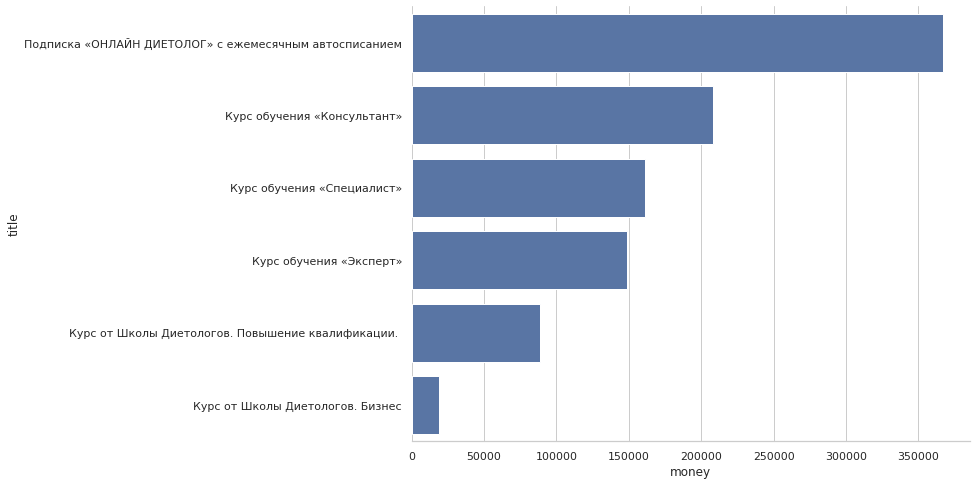

In [22]:
#Отобразить распределение на гистограмме 
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 8))

ax = sns.barplot(x="money", y="title", data=money_by_title_df,
                 color="b", orient="h")

sns.despine(left=True, bottom=False)

In [23]:
fig = ax.get_figure()
fig.savefig('fig_money_by_title', bbox_inches ="tight")

In [24]:
#распределение заработка по городам 

In [25]:
df.head()

,number,date_creat,date_pay,title,status,money,city,pay_system
0,1062823,2019-01-12 10:50:00,2019-01-12 10:52:00,Курс обучения «Эксперт»,Завершен,29597.5,Чита,Сбербанк эквайринг
1,1062855,2019-01-12 20:53:00,2019-01-12 21:27:00,Курс обучения «Эксперт»,Завершен,17450.3,Краснодар,Яндекс.Касса
2,1062856,2019-01-12 21:43:00,NaT,Курс обучения «Специалист»,Отменен,0.0,NaN,NaN
3,1062880,2019-03-12 00:18:00,NaT,Курс обучения «Консультант»,Отменен,0.0,г.Москва и Московская область,NaN
4,1062899,2019-03-12 21:43:00,NaT,Курс обучения «Эксперт»,Отменен,0.0,г.Москва и Московская область,NaN


In [26]:
money_by_city_df = df \
    .query("status == 'Завершен'") \
    .groupby(['city'], as_index=False) \
    .aggregate({'money':'sum', 'status':'count'}) \
    .sort_values('money', ascending=False)\
    .rename(columns={'status':'succses_orders'})
money_by_city_df_plot = money_by_city_df.query('succses_orders > 1')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text major ticklabel objects>)

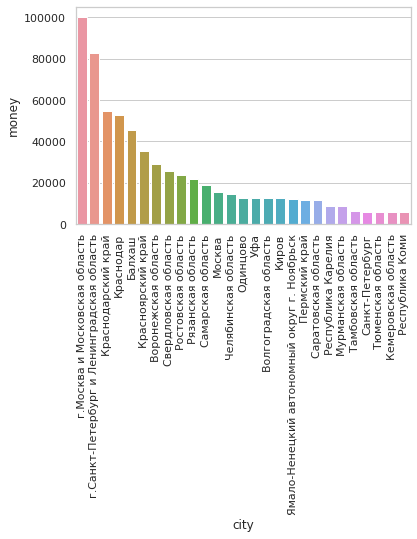

In [27]:
sns.barplot(data=money_by_city_df_plot,
           x='city', y='money')
plt.xticks(rotation=90)


In [28]:
df.head()

,number,date_creat,date_pay,title,status,money,city,pay_system
0,1062823,2019-01-12 10:50:00,2019-01-12 10:52:00,Курс обучения «Эксперт»,Завершен,29597.5,Чита,Сбербанк эквайринг
1,1062855,2019-01-12 20:53:00,2019-01-12 21:27:00,Курс обучения «Эксперт»,Завершен,17450.3,Краснодар,Яндекс.Касса
2,1062856,2019-01-12 21:43:00,NaT,Курс обучения «Специалист»,Отменен,0.0,NaN,NaN
3,1062880,2019-03-12 00:18:00,NaT,Курс обучения «Консультант»,Отменен,0.0,г.Москва и Московская область,NaN
4,1062899,2019-03-12 21:43:00,NaT,Курс обучения «Эксперт»,Отменен,0.0,г.Москва и Московская область,NaN


In [29]:
# Определим CR 
# (CR — это коэффициент конверсии. Он обозначает долю пользователей, 
#  которые совершили целевое действие, от всех пользователей, 
#  посетивших сайт или кликнувших по рекламному объявлению.)

In [30]:
cr_title = df.groupby(['title', 'status'], as_index=False)\
    .agg({'date_creat':'count'})\
    .pivot(index='title', columns='status', values='date_creat')\
    .fillna(0)\
    .reset_index()\
    .rename(columns={'В работе':'in_work',
            'Завершен':'complete', 
            'Ожидаем оплаты':'wait_pay',
            'Отменен':'cancel',
            'Частично оплачен':'Part_pay'})
    

In [31]:
all_status = df.groupby('title', as_index=False)\
    .agg({'date_creat':'count'})\
    .rename(columns={'date_creat':'count_all_status'})

In [32]:
cr_title = cr_title.merge(all_status, on='title')

In [33]:
cr_title['cr_complete'] = round(cr_title.complete/cr_title.count_all_status * 100, 2)

In [34]:
cr_title

,title,in_work,complete,wait_pay,cancel,Part_pay,count_all_status,cr_complete
0,Курс обучения «Консультант»,0.0,31.0,0.0,21.0,0.0,52,59.62
1,Курс обучения «Специалист»,0.0,7.0,0.0,5.0,0.0,12,58.33
2,Курс обучения «Эксперт»,0.0,5.0,0.0,17.0,0.0,22,22.73
3,Курс от Школы Диетологов. Бизнес,0.0,3.0,0.0,5.0,1.0,9,33.33
4,Курс от Школы Диетологов. Повышение квалификац...,0.0,9.0,0.0,5.0,1.0,15,60.00
5,Подписка «ОНЛАЙН ДИЕТОЛОГ» с ежемесячным автос...,1.0,125.0,1.0,55.0,0.0,182,68.68


In [35]:
cr_title_heu = df.groupby(['title', 'status'], as_index=False)\
    .agg({'date_creat':'count'})
cr_title_heu

,title,status,date_creat
0,Курс обучения «Консультант»,Завершен,31
1,Курс обучения «Консультант»,Отменен,21
2,Курс обучения «Специалист»,Завершен,7
3,Курс обучения «Специалист»,Отменен,5
4,Курс обучения «Эксперт»,Завершен,5
5,Курс обучения «Эксперт»,Отменен,17
6,Курс от Школы Диетологов. Бизнес,Завершен,3
7,Курс от Школы Диетологов. Бизнес,Отменен,5
8,Курс от Школы Диетологов. Бизнес,Частично оплачен,1
9,Курс от Школы Диетологов. Повышение квалификац...,Завершен,9


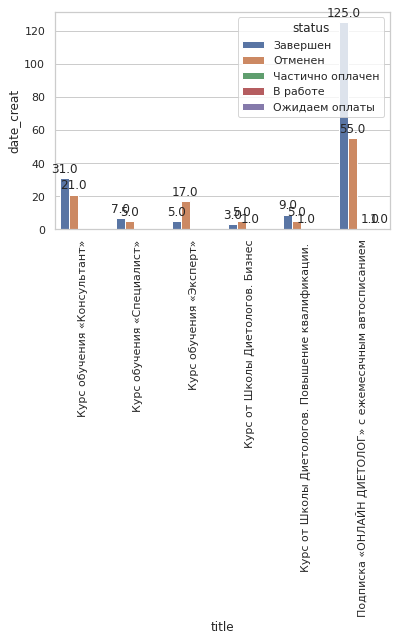

In [36]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(
    data=cr_title_heu,
    x="title", y="date_creat", hue="status")
plt.xticks(rotation = 90)
for p in ax.patches: 
    ax.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 9), 
                   textcoords='offset points') 

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

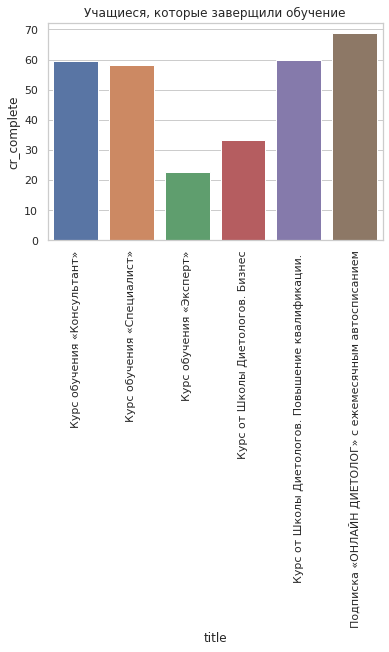

In [37]:
x = sns.barplot(
    data=cr_title,
    x="title", y="cr_complete").set(title='Учащиеся, которые заверщили обучение')
plt.xticks(rotation = 90)

In [38]:
money_by_title_df.title



5    Подписка «ОНЛАЙН ДИЕТОЛОГ» с ежемесячным автос...
0                          Курс обучения «Консультант»
1                           Курс обучения «Специалист»
2                              Курс обучения «Эксперт»
4    Курс от Школы Диетологов. Повышение квалификац...
3                     Курс от Школы Диетологов. Бизнес
Name: title, dtype: object

In [39]:
# Небольшая аналитическая записка
# 1. Подписка «ОНЛАЙН ДИЕТОЛОГ» с ежемесячным автосписанием является самым востребованым курсом на платформе
# 2. Данный курс заканчивает более 65% учащихся
# 3. Курс обучения «Эксперт» имеет наименьший CR_complete(более 70%) (наибольший процент возвратов, что-то с ним нужно делать)
# 4. Курс от Школы Диетологов. Бизнес имеет CR_complete более 50%
